# Visualização dos Dados

In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('musicas_features.xlsx', usecols = "B:T")
df.dropna(subset=['id'])
df = df.drop_duplicates(subset=['id'], keep='last')
df['Ano'] = df['Ano'].astype(int)
df.head()

,Posicao,Musica,Artista,Ano,id,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.0,Balancê,Gal Costa,1980,2m1G38M0gJuE4aVPh0tmIP,1979-01-08,0.638,0.736,9.0,-10.536,1.0,0.0811,0.0849,0.000000,0.333,0.881,144.823,188667.0,4.0
1,4.0,Momentos,Joanna,1980,5ncQCIFnjpHWRXbuKFG8RP,2002-11-08,0.501,0.296,7.0,-12.018,0.0,0.0292,0.8020,0.006370,0.117,0.305,132.462,235147.0,4.0
2,5.0,Menino do Rio,Baby Consuelo,1980,6tisytwaOaBA4CAZPPdlFP,1978-09-14,0.380,0.548,0.0,-9.260,1.0,0.0333,0.7300,0.000142,0.310,0.395,152.498,263733.0,4.0
3,6.0,Toada (Na Direção do Dia),Boca Livre,1980,2LO6c0rfmBm49Qs9KtQR1W,2007-01-01,0.402,0.506,6.0,-13.094,0.0,0.0409,0.9280,0.000946,0.728,0.446,97.082,233707.0,4.0
4,9.0,Meu Bem Querer,Djavan,1980,5ogHB4oYt1C7kaWJYm5MDG,1999-03-25,0.519,0.457,9.0,-8.450,1.0,0.0326,0.7630,0.000666,0.796,0.264,81.561,254800.0,4.0


In [3]:
plt.rcParams["figure.figsize"] = (8,4)

## Danceability

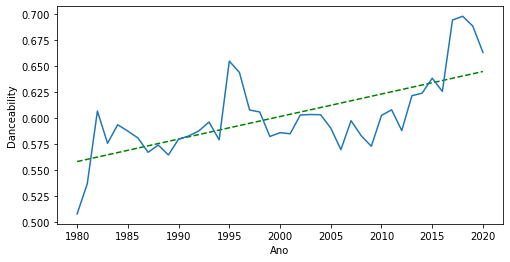

In [4]:
feature = df.groupby(by='Ano').mean()['danceability'].reset_index()

z = np.polyfit(feature['Ano'], feature['danceability'], 1)
p = np.poly1d(z)
plt.plot(feature['Ano'],p(feature['Ano']),"g--")
plt.plot(feature['Ano'], feature['danceability'])

plt.xlabel("Ano")
plt.ylabel("Danceability")
plt.show()

## Duração das músicas

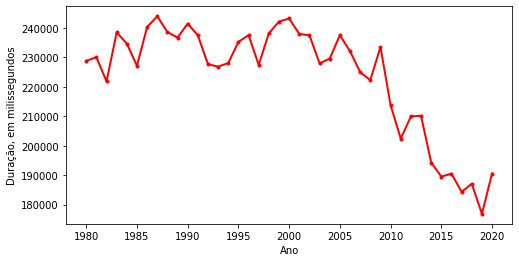

In [5]:
feature = df.groupby(by='Ano').mean()['duration_ms'].reset_index()

plt.plot('Ano', 'duration_ms', data=feature, marker='.', color='red', linewidth=2)


plt.xlabel("Ano")
plt.ylabel("Duração, em milissegundos")
plt.show()

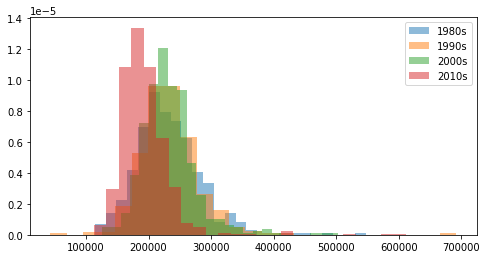

In [6]:
fig, ax = plt.subplots()

ax.hist(df[(df['Ano'] >= 1980) & (df['Ano'] < 1990)]['duration_ms'], 
        histtype="stepfilled", bins=25, alpha=0.5, density=True, label='1980s')
ax.hist(df[(df['Ano'] >= 1990) & (df['Ano'] < 2000)]['duration_ms'], 
        histtype="stepfilled", bins=25, alpha=0.5, density=True, label='1990s')
ax.hist(df[(df['Ano'] >= 2000) & (df['Ano'] < 2010)]['duration_ms'], 
        histtype="stepfilled", bins=25, alpha=0.5, density=True, label='2000s')
ax.hist(df[(df['Ano'] >= 2010) & (df['Ano'] <= 2020)]['duration_ms'], 
        histtype="stepfilled", bins=25, alpha=0.5, density=True, label='2010s')

plt.legend()
plt.show()

## Batidas por minuto

<AxesSubplot:xlabel='Ano', ylabel='tempo'>

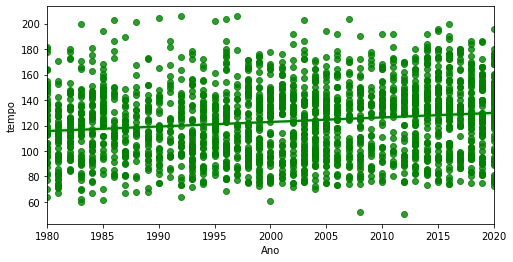

In [17]:
sns.regplot(x=df["Ano"], y=df["tempo"], color="g")

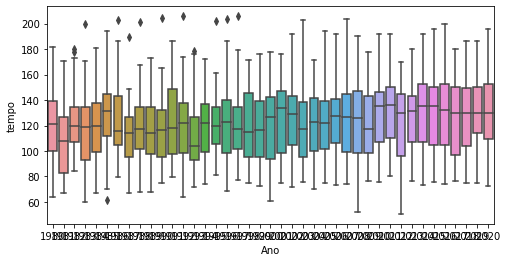

In [8]:
ax = sns.boxplot(x="Ano", y="tempo", data=df)

## Gravações ao vivo

<AxesSubplot:xlabel='Ano', ylabel='Gravações ao vivo'>

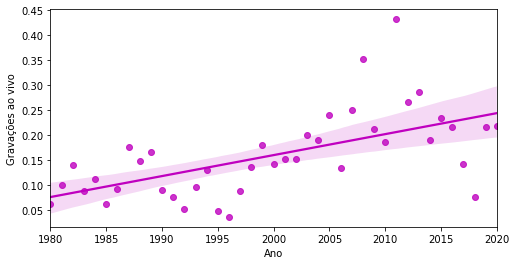

In [18]:
liveness = pd.DataFrame({'Ano': [], 'Gravações ao vivo': []})

liveness['Ano'] = df.groupby(['Ano']).agg({'liveness': 'count'}).reset_index()['Ano']
liveness['Gravações ao vivo'] = df[df['liveness'] > 0.8].groupby(['Ano']).agg({'liveness': 'count'}).reset_index()['liveness'] / df.groupby(['Ano']).agg({'liveness': 'count'}).reset_index()['liveness']

sns.regplot(x=liveness['Ano'], y=liveness['Gravações ao vivo'], color="m")

## Speechiness

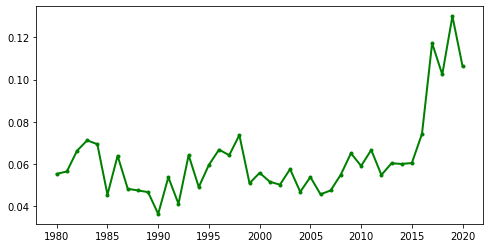

In [10]:
speechiness = df.groupby(by='Ano').mean()['speechiness'].reset_index()

plt.plot('Ano', 'speechiness', data=speechiness, marker='.', color='green', linewidth=2)

## Valence

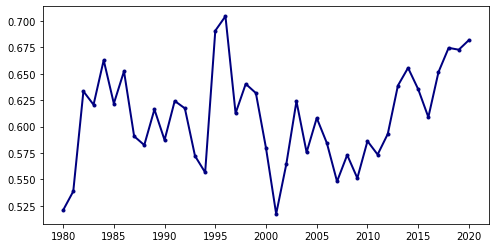

In [11]:
valence = df.groupby(by='Ano').mean()['valence'].reset_index()

plt.plot('Ano', 'valence', data=valence, marker='.', color='navy', linewidth=2)

In [12]:
# Explorando os dados para o atributo valence do ano que houve pico no valor médio observado acima
df[df['Ano'] == 1996].sort_values(by='valence', ascending=False)[['Musica', 'Artista', 'valence']]

,Musica,Artista,valence
795,Timbalada,Agua mineral,0.970
801,Tão Seu,Skank,0.969
799,Florentina,Tiririca,0.966
822,Preciso de você,Netinho,0.960
788,"Tic, Tic, Tac",Carrapicho,0.960
793,Rionegro e Solimões,Chora viola,0.932
784,A namorada,Carlinhos Brown,0.931
805,"Devagar, Devagarinho",Martinho da Vila,0.927
786,La Bella Luna,Os Paralamas do Sucesso,0.927
769,recado a minha Amada,Katinguelê,0.926


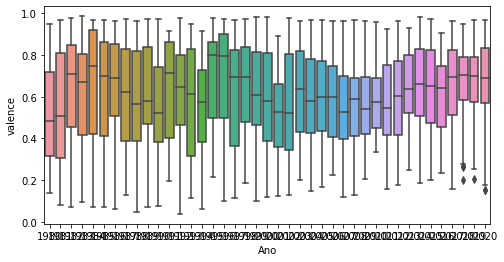

In [13]:
ax = sns.boxplot(x="Ano", y="valence", data=df)

In [14]:
df.corr()

,Posicao,Ano,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Posicao,1.000000,-0.010277,-0.014478,0.003536,0.007301,-0.021814,-0.012564,-0.012139,-0.000640,-0.000867,0.000523,0.039885,-0.046248,-0.030527,-0.008067
Ano,-0.010277,1.000000,0.222441,0.344342,0.022819,0.586465,-0.021803,0.186753,-0.038562,-0.062624,0.155571,0.064520,0.149934,-0.313208,0.064962
danceability,-0.014478,0.222441,1.000000,0.232274,0.035654,0.205160,-0.142602,0.118349,-0.196669,0.015156,-0.221945,0.536313,-0.055368,-0.190190,0.139636
energy,0.003536,0.344342,0.232274,1.000000,-0.018003,0.735270,-0.051159,0.183656,-0.453477,-0.099667,0.287839,0.498153,0.238661,-0.176030,0.119256
key,0.007301,0.022819,0.035654,-0.018003,1.000000,-0.008075,-0.134892,0.036161,0.016499,0.019156,-0.015595,0.015630,-0.031916,-0.008251,-0.011504
loudness,-0.021814,0.586465,0.205160,0.735270,-0.008075,1.000000,-0.002205,0.140889,-0.281516,-0.174946,0.200193,0.230338,0.189042,-0.217360,0.069042
mode,-0.012564,-0.021803,-0.142602,-0.051159,-0.134892,-0.002205,1.000000,-0.096777,0.046130,-0.012017,0.062925,-0.120551,-0.014193,-0.007435,-0.044773
speechiness,-0.012139,0.186753,0.118349,0.183656,0.036161,0.140889,-0.096777,1.000000,-0.069335,-0.002983,0.051512,0.162908,0.101288,-0.147300,0.069373
acousticness,-0.000640,-0.038562,-0.196669,-0.453477,0.016499,-0.281516,0.046130,-0.069335,1.000000,-0.048453,0.057241,-0.271738,-0.100049,0.009352,-0.120816
instrumentalness,-0.000867,-0.062624,0.015156,-0.099667,0.019156,-0.174946,-0.012017,-0.002983,-0.048453,1.000000,-0.048879,-0.045845,-0.011454,0.010522,-0.005599


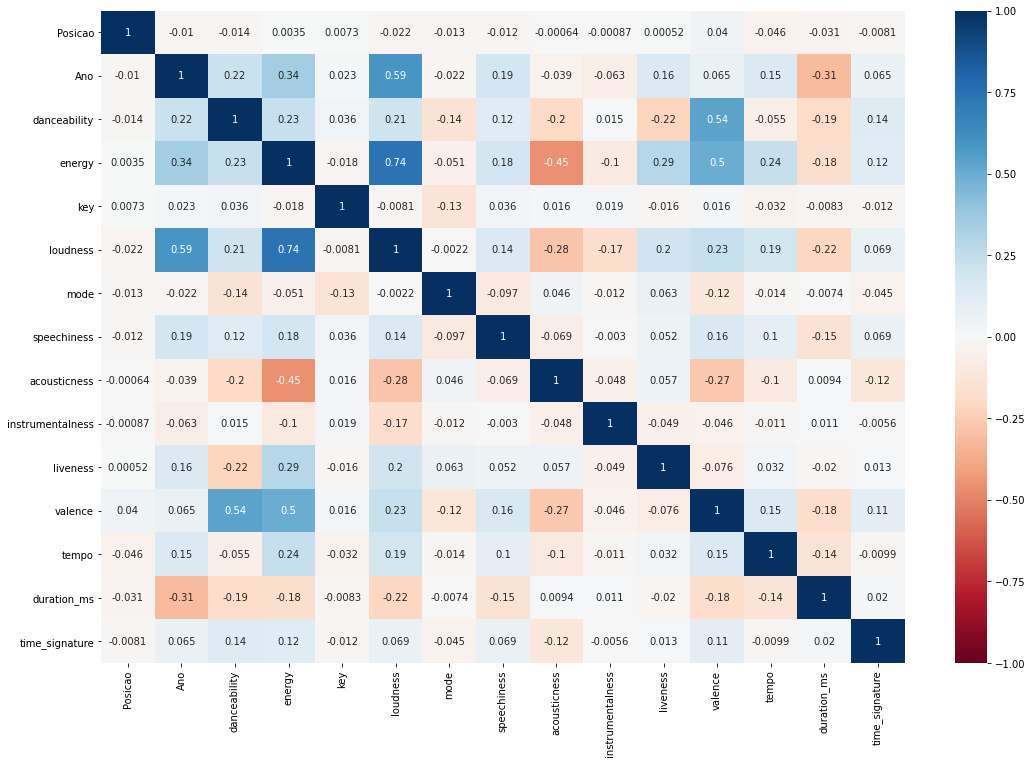

In [20]:
plt.rcParams["figure.figsize"] = (18,12)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')